## Creating Imbalnced dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
%matplotlib notebook

dataset = load_digits()

In [4]:
X, y = dataset.data, dataset.target

#for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
#    print("Class Name: {} \t Class Count: {}".format(class_name, class_count))
    
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [25]:
# create dataset with imbalanced binary classes. 
# Negative class (0) is not a digit
# positive class (1) is a digit
y_binary_imbalanced = y.copy()
## Here all index position values have been set to 0 except for 
## index position which contain value == 1 this is done to create and imbalanced dataset
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
print("Original labels \t", y[1:30])
print("New labels \t", y_binary_imbalanced[1:30])
print("Count of classes", np.bincount(y_binary_imbalanced))

Original labels 	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New labels 	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Count of classes [1615  182]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=0.1).fit(X_train, y_train)
## Even for imbalanced set we get a very high score value.
svm.score(X_test, y_test)

0.9044444444444445

### Dummy Classifier
#### Dummy Classifier is a classifier that makes prediction using simple rules, which can be useful as a baseline for comparision against actual classifier. Its specially helpful with imbalanced classes. 

In [29]:
from sklearn.dummy import DummyClassifier
# negative class (0) is more frequest
dummyClf = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
print("Dummy classifier score {}".format(dummyClf.score(X_test, y_test)))

y_test_dummy_predict = dummyClf.predict(X_test)
print(y_test_dummy_predict) ## All output value prediction is 0



Dummy classifier score 0.9044444444444445
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [30]:
## Support Vector Machine with kernel == liners
svm = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9733333333333334

## Confusion matrix

### Using dummy classfier with startegy "most_frequent", "stratified"


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
strategies = ["most_frequent", "stratified"]
for strat in strategies:
    dummyClf = DummyClassifier(strategy = strat).fit(X_train, y_train)
    y_test_predict = dummyClf.predict(X_test)
    confusion = confusion_matrix(y_test, y_test_predict)
    print("Confusion Matrix with Dummy Classifier Starategy: \"{} \" is\n {}".format(strat, confusion))
    


Confusion Matrix with Dummy Classifier Starategy: "most_frequent " is
 [[407   0]
 [ 43   0]]
Confusion Matrix with Dummy Classifier Starategy: "stratified " is
 [[365  42]
 [ 39   4]]


### Using Support Vector Machine with kernel = linear


In [49]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm = SVC(kernel = 'linear').fit(X_train, y_train)
svm_y_test_predict = svm.predict(X_test)

confusion = confusion_matrix(y_test, svm_y_test_predict)
print("Confusion matrix with SVM classifier: \n {}".format(confusion))

Confusion matrix with SVM classifier: 
 [[402   5]
 [  5  38]]


### Using LogisticRegession 

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
lr_y_test_predict = clf.predict(X_test)
confusion = confusion_matrix(y_test, lr_y_test_predict)
print("Confusion matrix with LogisticRegression classifier: \n {}".format(confusion))

Confusion matrix with LogisticRegression classifier: 
 [[401   6]
 [  6  37]]


In [47]:
### using Decisiontree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dtclf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dt_y_test_predict = dtclf.predict(X_test)
confusion = confusion_matrix(y_test, dt_y_test_predict)
print("Confusion matrix with DecisionTreeClassifier classifier: \n {}".format(confusion))

Confusion matrix with DecisionTreeClassifier classifier: 
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# accuracy = (TP + TN)/ (TP + TN + FP + FN)
# recall = TP/(TP + FN)
# precision = TP/(TP + FP)
# f1 = 2*TP/(2*TP + FN + FP)

print("accuracy score: \t{:.3f}".format(accuracy_score(y_test, y_test_predict)))
print("recall score: \t{:.3f}".format(recall_score(y_test, y_test_predict)))
print("precision score: \t{:.3f}".format(precision_score(y_test, y_test_predict)))
print("f1 score: \t{:.3f}".format(f1_score(y_test, y_test_predict)))


accuracy score: 	0.947
recall score: 	0.605
precision score: 	0.788
f1 score: 	0.684


#### classification report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [50]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_test_dummy_predict, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_y_test_predict, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_y_test_predict, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, dt_y_test_predict, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.90      1.00      0.95       407
          1       0.00      0.00      0.00        43

avg / total       0.82      0.90      0.86       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



C:\Varun\AppliedDataScienceWithPython\Python\venv\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision function and predict_proba

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)
y_test_decision_scores = clf.decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_test_decision_scores[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.170886635032367),
 (0, -13.541054798849387),
 (0, -21.718413136457976),
 (0, -18.903020550902248),
 (0, -19.7269666643861),
 (0, -9.747628871855815),
 (1, 5.235051314423329),
 (0, -19.310537938137294),
 (0, -25.095759344767664),
 (0, -21.825189510495207),
 (0, -24.151852734844528),
 (0, -19.576855810540003),
 (0, -22.568658205900537),
 (0, -10.827496606118995),
 (0, -11.91420728411845),
 (0, -10.978199252947608),
 (1, 11.208246208567669),
 (0, -27.65478206154317),
 (0, -12.865793269895619),
 (0, -25.854664390304848)]

In [56]:
y_test_predict_proba_score = clf.predict_proba(X_test)
y_score_list = list(zip(y_test[0:20], y_test_predict_proba_score[0:20, 1]))
y_score_list

[(0, 8.649914078868219e-11),
 (0, 1.3158126286243035e-06),
 (0, 3.696689883353834e-10),
 (0, 6.173372468198197e-09),
 (0, 2.7082405211646893e-09),
 (0, 5.842963762979811e-05),
 (1, 0.9947016706742451),
 (0, 4.107143992825214e-09),
 (0, 1.2619733897929706e-11),
 (0, 3.3223136379213224e-10),
 (0, 3.2432739177225284e-11),
 (0, 3.146875397559668e-09),
 (0, 1.5796332879748914e-10),
 (0, 1.984583389607351e-05),
 (0, 6.6945688566289126e-06),
 (0, 1.7069516901045985e-05),
 (1, 0.9999864382844827),
 (0, 9.76519123035378e-13),
 (0, 2.5849720695693154e-06),
 (0, 5.908291631682226e-12)]

### Precision Recall Curve


C:\Varun\AppliedDataScienceWithPython\Python\venv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


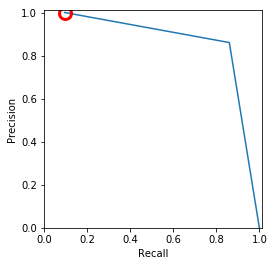

In [62]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, lr_y_test_predict)
closet_zero = np.argmin(threshold)
closet_zero_precision = precision[closet_zero]
closet_zero_recall = recall[closet_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closet_zero_precision, closet_zero_recall, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axes().set_aspect('equal')
plt.show()

In [60]:
precision, recall, threshold

(array([0.09555556, 0.86046512, 1.        ]),
 array([1.        , 0.86046512, 0.        ]),
 array([0, 1]))

### ROC (Receiver operating characteristics) Curve and AUC (Area under ROC curve)

C:\Varun\AppliedDataScienceWithPython\Python\venv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


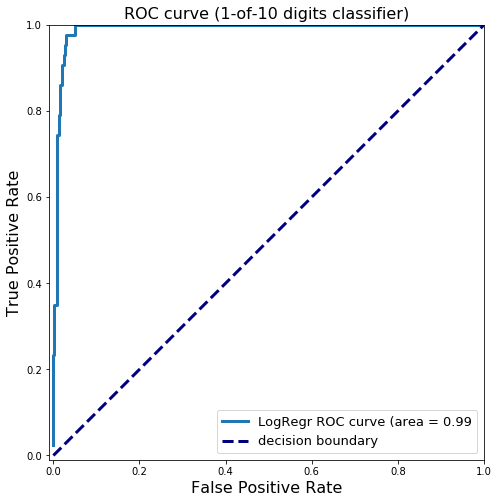

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)
y_test_decision_scores = clf.decision_function(X_test)

## Calculate FalsePositiveRate, TruePositiveRate using roc_curve
fpr, tpr, _ = roc_curve(y_test, y_test_decision_scores)
roc_curve_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:.2f}'.format(roc_curve_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='decision boundary')
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.show()


Gamma = 0.01 	 accuracy = 0.91 AUC = 0.99
Gamma = 0.10 	 accuracy = 0.90 AUC = 0.99
Gamma = 0.20 	 accuracy = 0.90 AUC = 0.99
Gamma = 1.00 	 accuracy = 0.90 AUC = 0.99


C:\Varun\AppliedDataScienceWithPython\Python\venv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


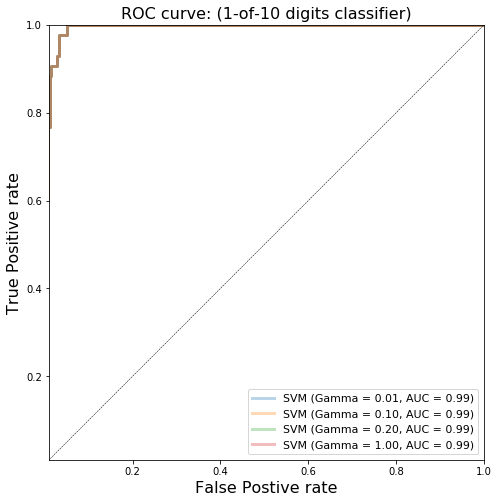

In [71]:
from matplotlib import cm
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure(figsize=(10, 8))
plt.xlim([0.01, 1])
plt.ylim([0.01, 1])

for g in [0.01, 0.1, 0.20, 1]:
    svc = SVC(gamma = g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score_svm)
    roc_curve_auc = auc(fpr, tpr)
    accuracy_svm = svc.score(X_test, y_test)
    print("Gamma = {:.2f} \t accuracy = {:.2f} AUC = {:.2f}".format(g, accuracy_svm, roc_curve_auc))
    plt.plot(fpr, tpr, lw=3, alpha=0.3, label="SVM (Gamma = {:.2f}, AUC = {:.2f})".format(g, roc_curve_auc))

plt.xlabel('False Postive rate', fontsize=16)
plt.ylabel('True Positive rate', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()


### Evaluation measures for multi class classification

#### Multi-Class confusion matrix


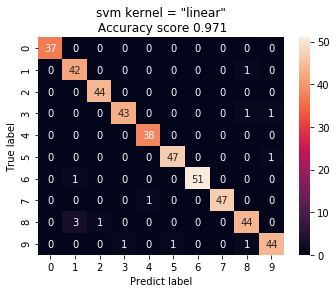

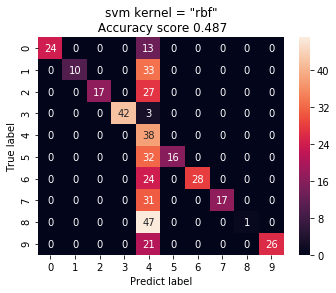

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
svm = SVC(kernel = 'linear').fit(X_train, y_train)
y_test_predict_svm_linear = svm.predict(X_test)
confusion = confusion_matrix(y_test, y_test_predict_svm_linear)
dfConfusion = pd.DataFrame(confusion, index=[i for i in range(0, 10, 1)], columns = [i for i in range(0, 10)])
plt.figure(figsize=(5.5, 4))
sns.heatmap(dfConfusion, annot=True);
plt.title('svm kernel = \"linear\"\n Accuracy score {:.3f}'.format(accuracy_score(y_test, y_test_predict_svm_linear)))
plt.ylabel('True label')
plt.xlabel('Predict label');

## Changing SVM kernel model to 'rbf'
svm = SVC(kernel = 'rbf').fit(X_train, y_train)
y_test_predict_svm_rbf = svm.predict(X_test)
confusion = confusion_matrix(y_test, y_test_predict_svm_rbf)
dfConfusion = pd.DataFrame(confusion, index=[i for i in range(0, 10, 1)], columns = [i for i in range(0, 10)])
plt.figure(figsize=(5.5, 4))
sns.heatmap(dfConfusion, annot=True);
plt.title('svm kernel = \"rbf\"\n Accuracy score {:.3f}'.format(accuracy_score(y_test, y_test_predict_svm_rbf)))
plt.ylabel('True label')
plt.xlabel('Predict label');

In [90]:
from pprint import pprint as pp
print("Classfication for Predicted o/p from SVM Linear Kernel")
pp(classification_report(y_test, y_test_predict_svm_linear))
print("Classfication for Predicted o/p from SVM RBF Kernel")
pp(classification_report(y_test, y_test_predict_svm_rbf))

Classfication for Predicted o/p from SVM Linear Kernel
('             precision    recall  f1-score   support\n'
 '\n'
 '          0       1.00      1.00      1.00        37\n'
 '          1       0.91      0.98      0.94        43\n'
 '          2       0.98      1.00      0.99        44\n'
 '          3       0.98      0.96      0.97        45\n'
 '          4       0.97      1.00      0.99        38\n'
 '          5       0.98      0.98      0.98        48\n'
 '          6       1.00      0.98      0.99        52\n'
 '          7       1.00      0.98      0.99        48\n'
 '          8       0.94      0.92      0.93        48\n'
 '          9       0.96      0.94      0.95        47\n'
 '\n'
 'avg / total       0.97      0.97      0.97       450\n')
Classfication for Predicted o/p from SVM RBF Kernel
('             precision    recall  f1-score   support\n'
 '\n'
 '          0       1.00      0.65      0.79        37\n'
 '          1       1.00      0.23      0.38        43\n'
 '  

### Micro and Macro Average

In [98]:
from sklearn.metrics import precision_score, f1_score
#print(precision_score(y_test, y_test_predict_svm_linear))
print("Micro average Precision (treat instances equally)\n{}".format(precision_score(y_test, y_test_predict_svm_linear, average='micro')))
print("Macro average Precision (treat classes equally)\n{}".format(precision_score(y_test, y_test_predict_svm_linear, average='macro')))

Micro average Precision (treat instances equally)
0.9711111111111111
Macro average Precision (treat instances equally)
0.9714311576233408


In [99]:
print("Micro average F1Score (treat instances equally)\n{}".format(f1_score(y_test, y_test_predict_svm_linear, average='micro')))
print("Macro average F1Score (treat classes equally)\n{}".format(f1_score(y_test, y_test_predict_svm_linear, average='macro')))

Micro average F1Score (treat instances equally)
0.9711111111111111
Macro average F1Score (treat instances equally)
0.9717373353133952


### Regression evaluation metrics


Linear Coef [-698.80206267]
Mean Squared error (dummy) 4965.13
Mean Squared error (Linear Regression) 4646.74
r2_score(dummy) -0.00
r2_score(Linear Regression) 0.06


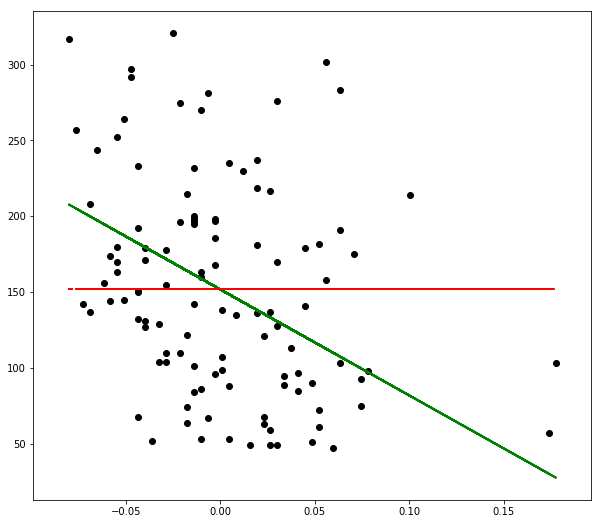

In [109]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor

datasets = load_diabetes()

X = datasets.data[:, None, 6]
y = datasets.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
dummy_lr = DummyRegressor(strategy='mean').fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
y_predict_dummy_lr = dummy_lr.predict(X_test)

print("Linear Coef {}".format(lr.coef_))
print("Mean Squared error (dummy) {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_lr)))
print("Mean Squared error (Linear Regression) {:.2f}".format(mean_squared_error(y_test, y_predict_lr)))
print("r2_score(dummy) {:.2f}".format(r2_score(y_test, y_predict_dummy_lr)))
print("r2_score(Linear Regression) {:.2f}".format(r2_score(y_test, y_predict_lr)))


plt.figure(figsize=(10, 9))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict_lr, color='green', lw=2,label='LinearRegression-PredictedOutput')
plt.plot(X_test, y_predict_dummy_lr, color='r', linestyle= 'dashed', lw = 2, label='DummyRegressor-PredictedOutput')
plt.show()

### Evaluation of various classfier
#### Cross validation evaluation

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits
dataset =load_digits()
## Making this a binary classification where target == 1
## corresponds to positive class and others as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

## Cross validating the score via different scoring metrics
print ("cross validation score(accuracy):", cross_val_score(clf, X, y, cv=5))
print ("cross validation score(AUC)", cross_val_score(clf, X, y, cv=5, scoring='roc_auc'))
print ("cross validation score(recall)", cross_val_score(clf, X, y, cv=5, scoring='recall'))

cross validation score(accuracy): [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
cross validation score(AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
cross validation score(recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


### GridSearchCV example


In [115]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Kernel == "rbf"
clf = SVC(kernel='rbf')
grid_values = {'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

## Default metrics to optimize over grid parameter: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values)
grid_clf_acc.fit(X_train, y_train)
y_test_decision_func_grid_accu = grid_clf_acc.decision_function(X_test)

print("Grid best params (max. accuracy)", grid_clf_acc.best_params_)
print("Grid best score (accuracy)", grid_clf_acc.best_score_)


## alternative scoring metric to optimize over grid parameter : (AUC)
grid_clf_auc = GridSearchCV(clf, param_grid=grid_values, scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_test_decision_func_grid_auc =  grid_clf_auc.decision_function(X_test)

print("Test set AUC", roc_auc_score(y_test, y_test_decision_func_grid_auc))
print("Grid best params (max. AUC)", grid_clf_auc.best_params_)
print("Grid best score (AUC)", grid_clf_auc.best_score_)

Grid best params (max. accuracy) {'gamma': 0.001}
Grid best score (accuracy) 0.9962880475129918
Test set AUC 0.99982858122393
Grid best params (max. AUC) {'gamma': 0.001}
Grid best score (AUC) 0.9998741278302142


In [117]:
from sklearn.metrics.scorer import SCORERS

pp(sorted(list(SCORERS.keys())))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']


### Two feature classification example using digit dataset

#### Optimizing a classfier using various evaluation metrics

Grid best parameter (max. accuracy) {'class_weight': {1: 2}}
Grid best scores (max. accuracy) 0.9012620638455828
Grid best parameter (max. precision) {'class_weight': {1: 2}}
Grid best scores (max. precision) 0.5363568736694502
Grid best parameter (max. recall) {'class_weight': {1: 50}}
Grid best scores (max. recall) 0.9284310837047003
Grid best parameter (max. f1) {'class_weight': {1: 4}}
Grid best scores (max. f1) 0.5063596506363103
Grid best parameter (max. roc_auc) {'class_weight': {1: 5}}
Grid best scores (max. roc_auc) 0.8911377202827034


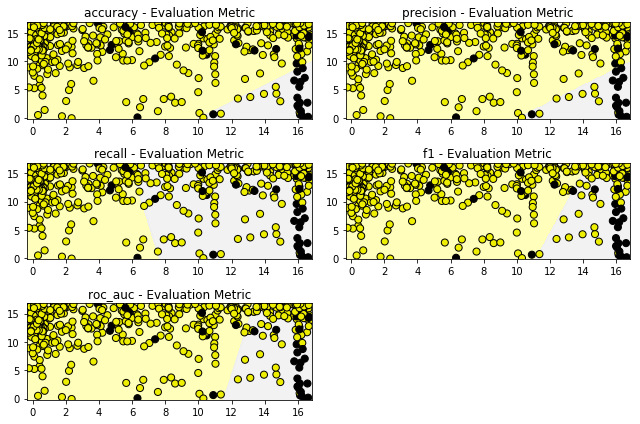

In [126]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

dataset = load_digits()
X, y = dataset.data, dataset.target == 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

jitter_delta = 0.25
## Take in two features
X_train_two_f = X_train[:, [20, 59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_test_two_f = X_test[:, [20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear').fit(X_train_two_f, y_train)

grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9, 6))
for i, eval_metric in enumerate(('accuracy', 'precision', 'recall', 'f1', 'roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_train_two_f, y_train)
    print("Grid best parameter (max. {}) {}".format(eval_metric, grid_clf_custom.best_params_))
    print("Grid best scores (max. {}) {}".format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    title = "{} - Evaluation Metric".format(eval_metric)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_test_two_f, y_test, None,
                                             None, title,  plt.subplot(3, 2, i+1))

    
plt.tight_layout()
plt.show()

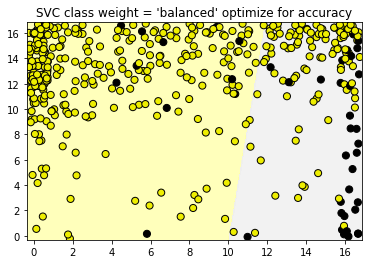

C:\Varun\AppliedDataScienceWithPython\Python\venv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


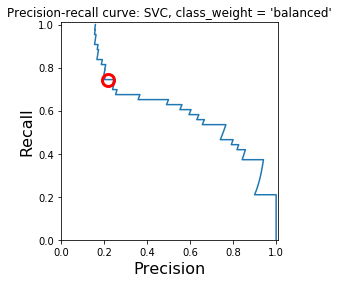

At "123" threshold, precision: 0.22, recall: 0.74


In [131]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits


dataset = load_digits()
X, y = dataset.data, dataset.target == 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

jitter_delta = 0.25
## Take in two features
X_train_two_f = X_train[:, [20, 59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_test_two_f = X_test[:, [20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

## with additional parameter: class_weight == balanced
clf = SVC(kernel='linear', class_weight='balanced').fit(X_train_two_f, y_train)
y_test_decision_func = clf.decision_function(X_test_two_f)
precision, recall, threshold = precision_recall_curve(y_test, y_test_decision_func)

closet_zero = np.argmin(np.abs(threshold))
closet_zero_precision = precision[closet_zero]
closet_zero_recall = recall[closet_zero]

plot_class_regions_for_classifier(clf, X_test_two_f, y_test, None, None, "SVC class weight = 'balanced' optimize for accuracy")


plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closet_zero_precision, closet_zero_recall, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At "{}" threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closet_zero, closet_zero_precision, closet_zero_recall))

In [139]:
grid_values = {'gamma':[0.01, 0.1, 1, 10]}
grid_clf_recall = GridSearchCV(clf, param_grid=grid_values, 
scoring='recall')
grid_clf_precision = GridSearchCV(clf, param_grid=grid_values, 
scoring='precision')
recall_best_score = grid_clf_recall.score(X_test_two_f, y_test)
precesion_best_score = grid_clf_precision.score(X_test_two_f, y_test)
print("{:.3f}".format(precesion_best_score - recall_best_score))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.